# 1. Clustering

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import matplotlib.pyplot as plt
import queue
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

In [ ]:
# Reading from the data file
df = pd.read_csv("/content/dataset1.txt", header = None)
df.columns = ["data"]
df = df.join(df['data'].str.split(' ', expand = True).rename(columns = {0:'daata', 1:'x1', 2:'x2'}))
del df['data']
df.columns = ['x1', 'x2']
dataset = df.astype(float).values.tolist()
X1 = StandardScaler().fit_transform(dataset)

df = pd.read_csv("/content/dataset2.txt", header = None)
df.columns = ["data"]
df = df.join(df['data'].str.split(' ', expand = True).rename(columns = {0:'daata', 1:'x1', 2:'x2'}))
del df['data']
df.columns = ['x1', 'x2']
dataset = df.astype(float).values.tolist()
# normalize dataset
X2 = StandardScaler().fit_transform(dataset)

## 1a Implementing Kmeans clustering on dataset1

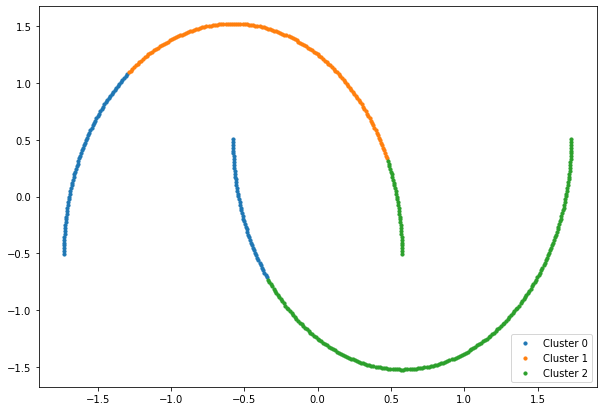

In [ ]:
clustering = KMeans(3).fit(X1)

plt.figure(figsize=(10,7))
for clust in np.unique(clustering.labels_):
    plt.scatter(X1[clustering.labels_ == clust, 0], X1[clustering.labels_ == clust, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {clust}" for clust in np.unique(clustering.labels_)], loc ="lower right")


## 1b Implementing DBSCAN from scratch

In [ ]:
class DBSCAN_Scratch():
    def __init__(self):
        self.core = -1
        self.border = -2

    # Find all neighbour points at epsilon distance
    def find_neighbours(self, data, pointIdx, eps):
        points = []
        for i in range(len(data)):
            # Euclidian distance
            if np.linalg.norm([a_i - b_i for a_i, b_i in zip(data[i], data[pointIdx])]) <= eps:
                points.append(i)
        return points

    # Fit the data into the DBSCAN model
    def fit(self, data, eps, minNumberPt):
        # initialize all points as outliers
        point_label = [0] * len(data)
        point_count = []

        # initilize list for core/border points
        core = []
        border = []

        # Find the neighbours of each individual point
        for i in range(len(data)):
            point_count.append(self.find_neighbours(data, i, eps))

        # Find all the core points, border points and outliers
        for i in range(len(point_count)):
            if (len(point_count[i]) >= minNumberPt):
                point_label[i] = self.core
                core.append(i)
            else:
                border.append(i)
        for i in border:
            for j in point_count[i]:
                if j in core:
                    point_label[i] = self.border
                    break

        # Assign points to a cluster

        cluster = 1

        # Here we use a queue to find all the neighbourhood points of a core point and find the indirectly reachable points
        # We are essentially performing Breadth First search of all points which are within Epsilon distance for each other
        for i in range(len(point_label)):
            q = queue.Queue()
            if (point_label[i] == self.core):
                point_label[i] = cluster
                for x in point_count[i]:
                    if(point_label[x] == self.core):
                        q.put(x)
                        point_label[x] = cluster
                    elif(point_label[x] == self.border):
                        point_label[x] = cluster
                while not q.empty():
                    neighbors = point_count[q.get()]
                    for y in neighbors:
                        if (point_label[y] == self.core):
                            point_label[y] = cluster
                            q.put(y)
                        if (point_label[y] == self.border):
                            point_label[y] = cluster
                cluster += 1  # Move on to the next cluster

        return point_label, cluster

    # Visualize the clusters
    def plotData(self, data, cluster, numberOfClusters):
        N = len(data)

        colors = np.array(list(islice(cycle(['#FE4A49', '#2AB7CA']), 3)))

        for i in range(numberOfClusters):
            if (i == 0):
                # Plot all outliers point as black
                color = '#000000'
            else:
                color = colors[i % len(colors)]

            x, y = [], []
            for j in range(N):
                if cluster[j] == i:
                    x.append(data[j, 0])
                    y.append(data[j, 1])
            plt.scatter(x, y, c=color, alpha=1, marker='.', label = 'Cluster'+str(i))
            plt.legend()
        plt.show()


[1, 2, 1, 2, 1, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 2, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 0, 2, 2, 1, 1, 1, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 0, 1, 2, 2, 

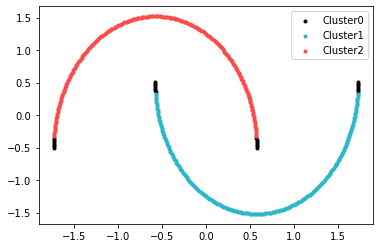

In [ ]:
DBSCAN_1 = DBSCAN_Scratch()
point_labels, clusters = DBSCAN_1.fit(X1, 0.25,20)

print(point_labels)
print( clusters)
print(set(point_labels))

DBSCAN_1.plotData(X1, point_labels, clusters)

##1c Difference between KMeans and DBSCAN algorithm outputs
We see that the clusters formed are different in both the algorithms, this is because:


*   KMeans forms clusters that are spherical or convex in shape only while DBSCAN forms clusters arbitrarily (anyshape).
*   KMeans cannot detect outliers which have been detected perfectly by the DBSCAN algorithm as the **points in the black coloured cluster**



## 1d KMeans and DBSCAN on Dataset 2
As we see **below** that the clustering of the given datapoints are same in both the algorithms. This is because **the given dataset is trivial thus resulting in the same output as opposed to the first dataset**

### Advantages
**KMeans:** Much faster than DBSCAN

**DBSCAN:**No prior knowledge of the number of clusters required

### Disadvantages
**KMeans:** Requires an estimate for the number of clusters

**DBSCAN:** Does  not work well with higher dimensional data and data with different densities


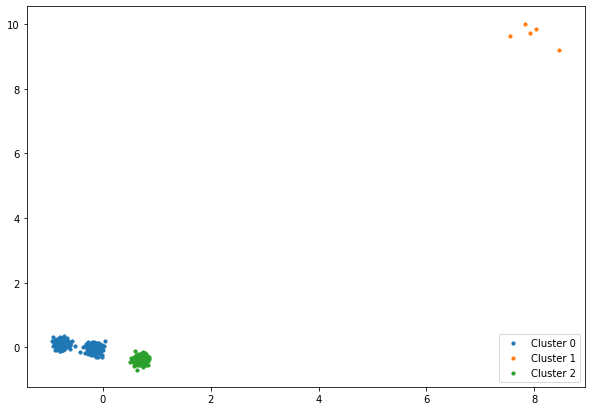

In [ ]:
clustering = KMeans(3).fit(X2)

plt.figure(figsize=(10,7))
for clust in np.unique(clustering.labels_):
    plt.scatter(X2[clustering.labels_ == clust, 0], X2[clustering.labels_ == clust, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {clust}" for clust in np.unique(clustering.labels_)], loc ="lower right")


[1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 

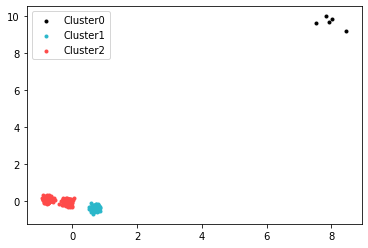

In [ ]:
DBSCAN_2 = DBSCAN_Scratch()
point_labels, clusters = DBSCAN_2.fit(X2, 0.25, 4)

print(point_labels)
print( clusters)
print(set(point_labels))

DBSCAN_2.plotData(X2, point_labels, clusters)